# [Magic wavelengths of the Ca+  ion for circularly polarized light](https://doi.org/10.1103/PhysRevA.96.042503)
Jun Jiang, Li Jiang, Xia Wang, Deng-Hong Zhang, Lu-You Xie, and Chen-Zhong Dong

Phys. Rev. A 96, 042503 – Published 12 October 2017

The dynamic dipole polarizabilities of low-lying states of Ca+ ions for circularly polarized light are calculated
by using the relativistic configuration interaction plus core polarization approach. The magic wavelengths
are determined for the magnetic sublevel transitions 4s1/2,m → 4pj,m and 4s1/2,m → 3dj,m with total angular
momentum j and its components m.

(For comparison, we calculate the dynamical polarizabilities and magic wavelengths using experimental data available from NIST)

In [1]:
from atomphys import Atom, Laser
import numpy as np
import matplotlib.pyplot as plt
from math import pi as π

import warnings
warnings.filterwarnings('ignore')

In [2]:
Ca = Atom('Ca+')
u = Ca.units

# Figure 1
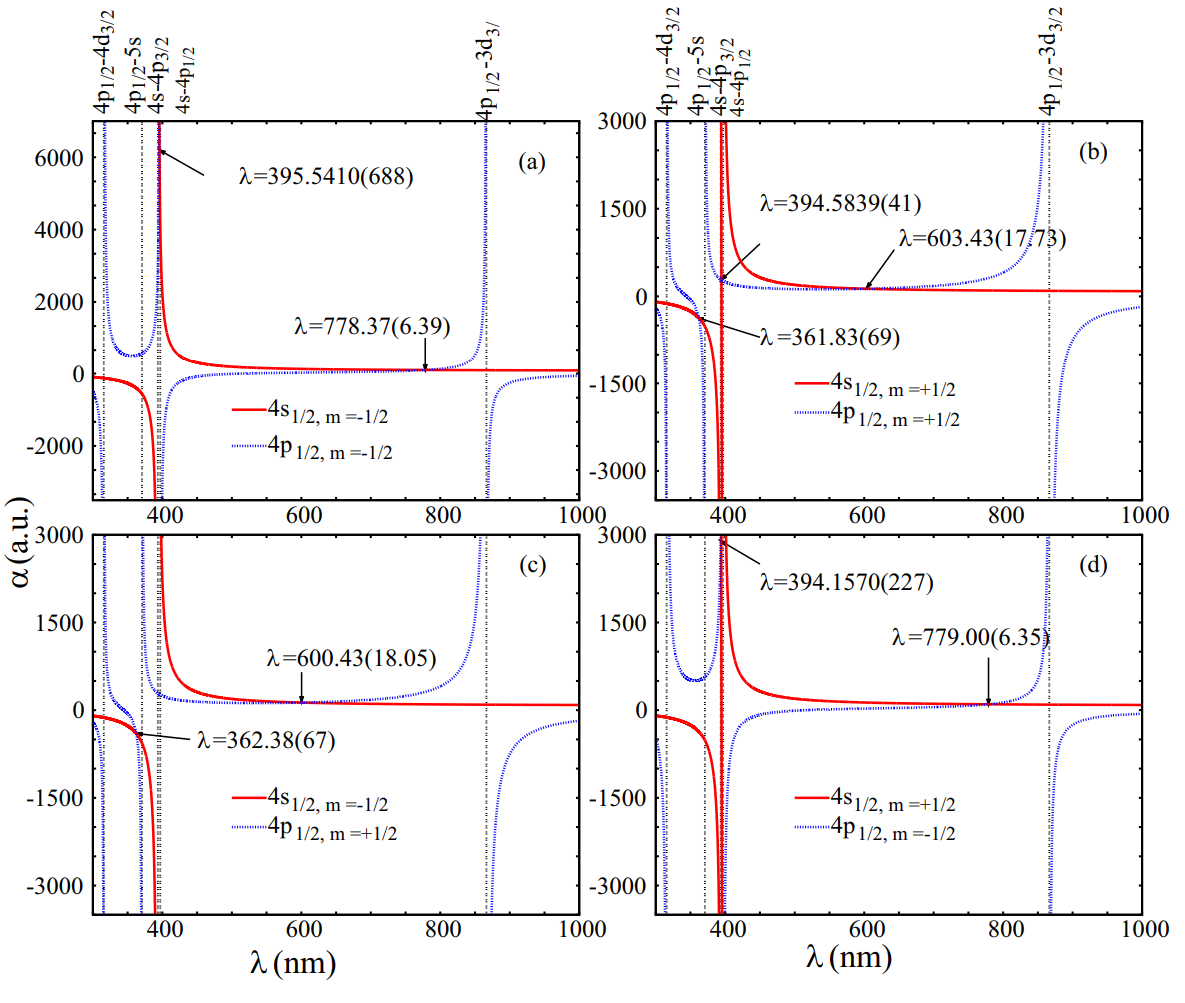

Dynamic polarizabilities for the 4s1/2 and 4p1/2 states of Ca+ for left-handed circularly polarized light. The obtained magic wavelengths are illustrated by arrows. The vertical lines identify the resonance transition wavelengths.

Text(0.5, 0, 'λ (nm)')

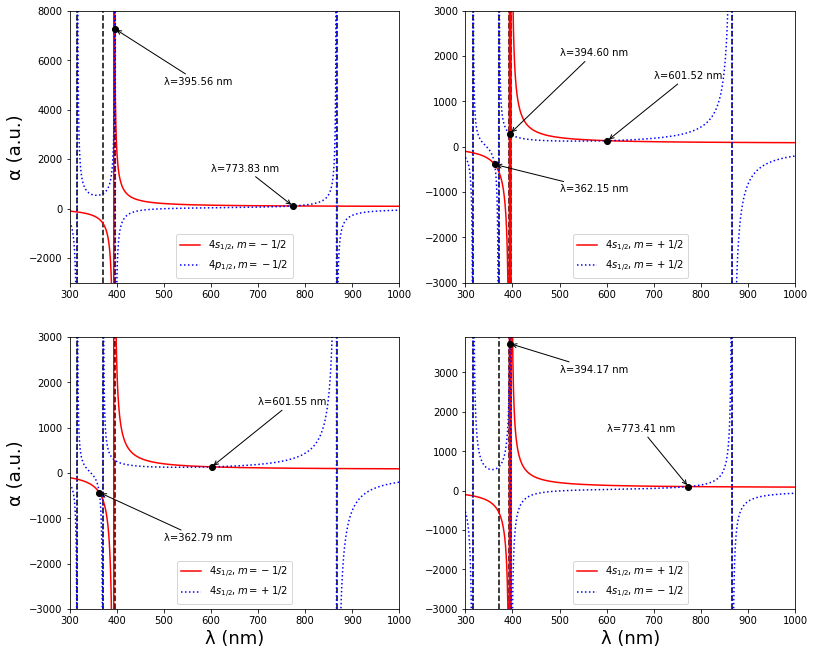

In [3]:
laser = Laser(λ=np.linspace(300, 1000, 10_000) * u.nm, A=-1)
transitions = Ca.transitions['S1/2:P1/2', 'S1/2:P3/2', 'P1/2:5s 2S1/2', '3d 2D3/2:P1/2', 'P1/2:4d 2D3/2']

plt.figure(figsize=(13,11))

def magic_wavelength(λ, mJ_i, mJ_f, xytext):
    λ_magic = Ca('S1/2').to('P1/2').magic_wavelength(λ, mJ_i, mJ_f, A=-1)
    α_magic = Ca('S1/2').α(mJ=mJ_i, A=-1, λ=λ_magic)
    plt.plot(λ_magic, α_magic, 'ko')
    plt.annotate(f'λ={λ_magic:~0.2f}', xy=(λ_magic.m, α_magic.m), xytext=xytext, 
                 arrowprops=dict(arrowstyle='->', connectionstyle='arc'))
    
plt.subplot(2,2,1)
plt.plot(laser.λ, Ca('S1/2').α(mJ=-1/2, laser=laser), 'r-', label=r'$4s_{1/2}, m=-1/2$')
plt.plot(laser.λ, Ca('P1/2').α(mJ=-1/2, laser=laser), 'b:', label=r'$4p_{1/2}, m=-1/2$')
plt.legend()
plt.xlim(300, 1000)
plt.ylim(-3000, 8000)
plt.vlines([transition.λ.to('nm').m for transition in transitions], *plt.ylim(), color='black', ls='dashed')
magic_wavelength(u('700 nm'), -1/2, -1/2, xytext=(600, 1500))
magic_wavelength(u('395 nm'), -1/2, -1/2, xytext=(500, 5000))
plt.ylabel('α (a.u.)', fontsize=18)

plt.subplot(2,2,2)
plt.plot(laser.λ, Ca('S1/2').α(mJ=+1/2, laser=laser), 'r-', label=r'$4s_{1/2}, m=+1/2$')
plt.plot(laser.λ, Ca('P1/2').α(mJ=+1/2, laser=laser), 'b:', label=r'$4s_{1/2}, m=+1/2$')
plt.legend()
plt.xlim(300, 1000)
plt.ylim(-3000, 3000)
plt.vlines([transition.λ.to('nm').m for transition in transitions], *plt.ylim(), color='black', ls='dashed')
magic_wavelength(u('600 nm'), +1/2, +1/2, xytext=(700, 1500))
magic_wavelength(u('394.5 nm'), +1/2, +1/2, xytext=(500, 2000))
magic_wavelength(u('360 nm'), +1/2, +1/2, xytext=(500, -1000))

plt.subplot(2,2,3)
plt.plot(laser.λ, Ca('S1/2').α(mJ=-1/2, laser=laser), 'r-', label=r'$4s_{1/2}, m=-1/2$')
plt.plot(laser.λ, Ca('P1/2').α(mJ=+1/2, laser=laser), 'b:', label=r'$4s_{1/2}, m=+1/2$')
plt.legend()
plt.xlim(300, 1000)
plt.ylim(-3000, 3000)
plt.vlines([transition.λ.to('nm').m for transition in transitions], *plt.ylim(), color='black', ls='dashed')
magic_wavelength(u('600 nm'), -1/2, +1/2, xytext=(700, 1500))
magic_wavelength(u('360 nm'), -1/2, +1/2, xytext=(500, -1500))
plt.xlabel('λ (nm)', fontsize=18)
plt.ylabel('α (a.u.)', fontsize=18)

plt.subplot(2,2,4)
plt.plot(laser.λ, Ca('S1/2').α(mJ=+1/2, laser=laser), 'r-', label=r'$4s_{1/2}, m=+1/2$')
plt.plot(laser.λ, Ca('P1/2').α(mJ=-1/2, laser=laser), 'b:', label=r'$4s_{1/2}, m=-1/2$')
plt.legend()
plt.xlim(300, 1000)
plt.ylim(-3000, 3900)
plt.vlines([transition.λ.to('nm').m for transition in transitions], *plt.ylim(), color='black', ls='dashed')
magic_wavelength(u('700 nm'), +1/2, -1/2, xytext=(600, 1500))
magic_wavelength(u('395 nm'), +1/2, -1/2, xytext=(500, 3000))
plt.xlabel('λ (nm)', fontsize=18)

# Figure 2
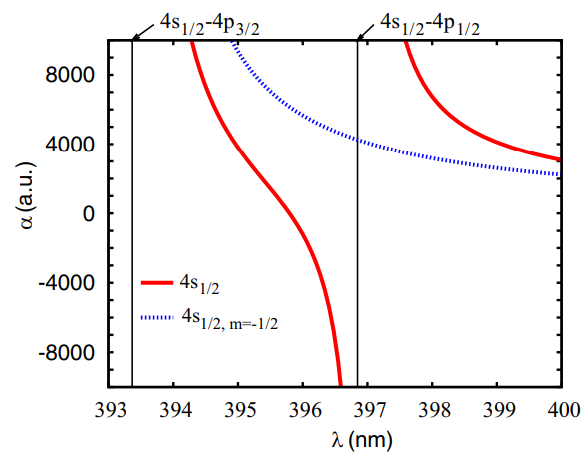
 Dynamic polarizabilities for the 4s1/2, m=−1/2 state of Ca+ in the
wavelength range 393–400 nm for linearly (A = 0, red solid line) and
left-handed circularly (A = −1, blue dotted line) polarized light. The
approximate positions of the 4s 1/22 → 4pj resonances are indicated by
vertical lines.

Text(0, 0.5, 'α (a.u.)')

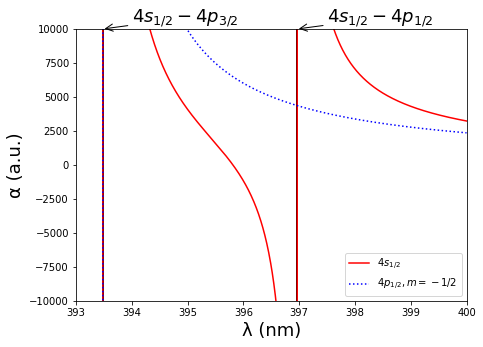

In [4]:
λ=np.linspace(393, 400, 1_000) * u.nm
transitions = Ca.transitions['S1/2:P1/2', 'S1/2:P3/2']

plt.figure(figsize=(7,5))

plt.plot(λ, Ca('S1/2').α(λ=λ), 'r-', label=r'$4s_{1/2}$')
plt.plot(λ, Ca('S1/2').α(λ=λ, mJ=-1/2, A=-1), 'b:', label=r'$4p_{1/2}, m=-1/2$')
plt.legend()
plt.xlim(393, 400)
plt.ylim(-10_000, 10_000)
plt.vlines([transition.λ.to('nm').m for transition in transitions], *plt.ylim(), color='black', lw=2)
plt.annotate(r'$4s_{1/2} - 4p_{1/2}$', xy=(transitions[0].λ.to('nm').m, 10_000), xytext=(397.5,10_500), 
             arrowprops=dict(arrowstyle='->'), fontsize=18)
plt.annotate(r'$4s_{1/2} - 4p_{3/2}$', xy=(transitions[1].λ.to('nm').m, 10_000), xytext=(394,10_500), 
             arrowprops=dict(arrowstyle='->'), fontsize=18)
plt.xlabel('λ (nm)', fontsize=18)
plt.ylabel('α (a.u.)', fontsize=18)

# Figure 4 ,5
From the [arxiv version](https://arxiv.org/abs/1703.09950v1)
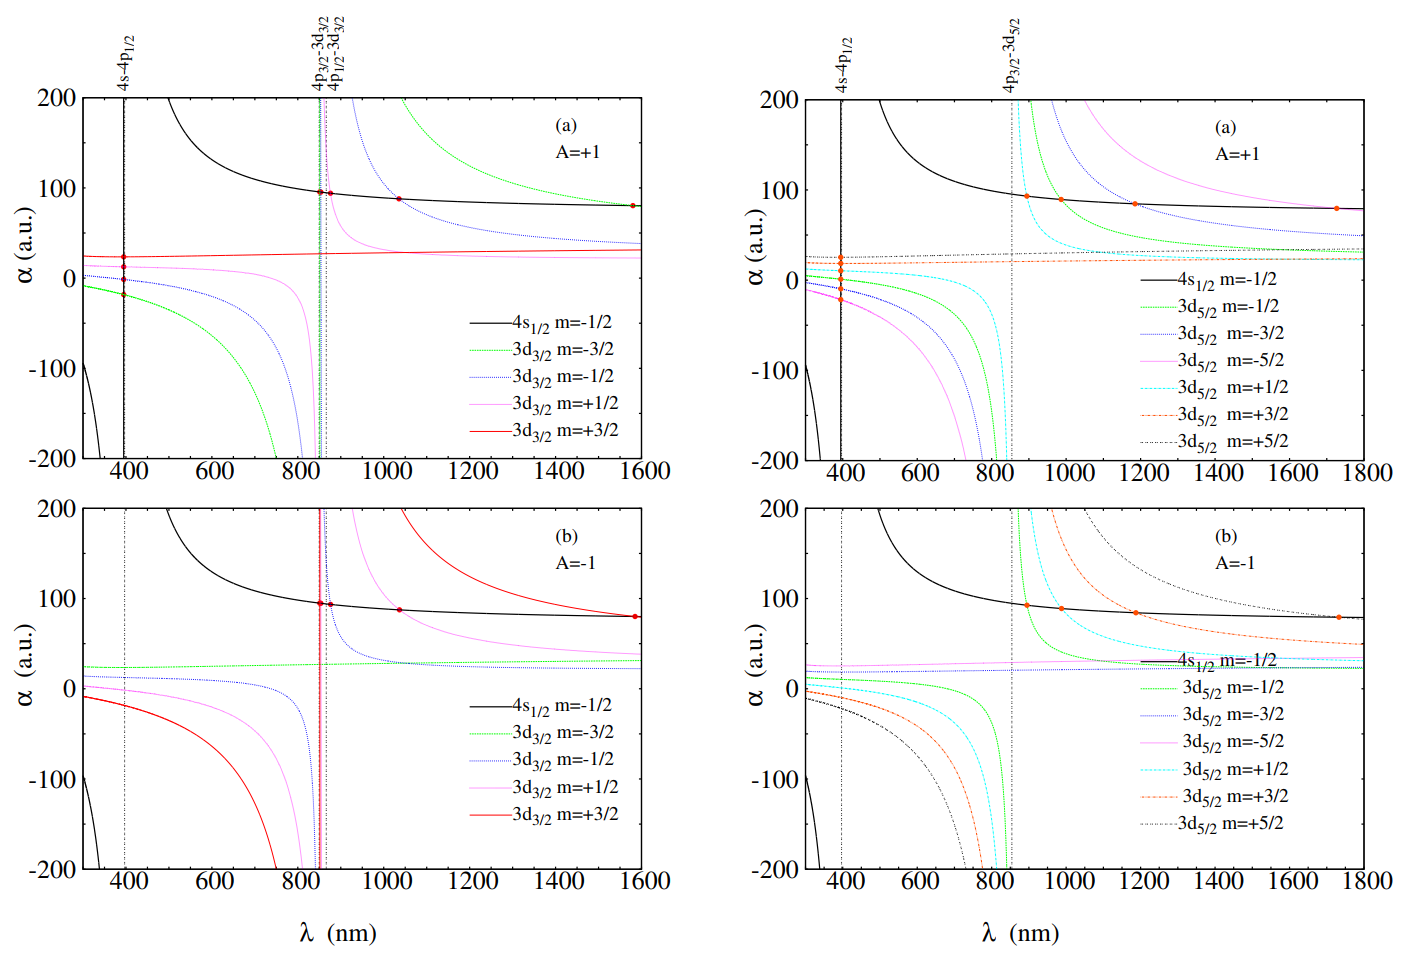
Dynamic polarizabilities (in au) for the 4s1/2 m=−1/2 and 3d3/2 mj, 3d5/2 mj
states of Ca+ for the left and right
handed circularly polarized light. 

Text(1400, 150, 'A=-1')

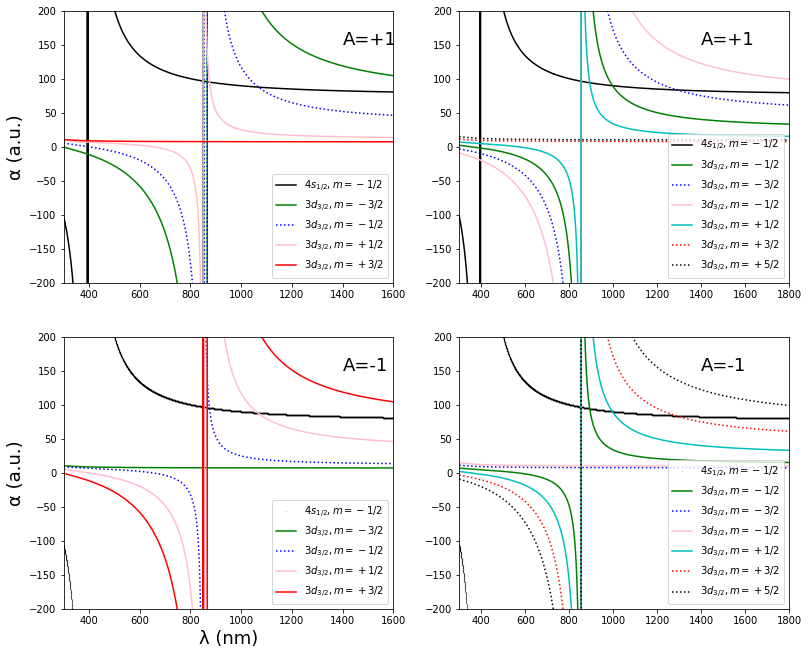

In [5]:
plt.figure(figsize=(13,11))

def magic_wavelength(λ, mJ_i, mJ_f, xytext):
    λ_magic = Ca('S1/2').to('D3/2').magic_wavelength(λ, mJ_i, mJ_f, A=-1)
    α_magic = Ca('S1/2').α(mJ=mJ_i, A=-1, λ=λ_magic)
    plt.plot(λ_magic, α_magic, 'ko')
    plt.annotate(f'λ={λ_magic:~0.2f}', xy=(λ_magic.m, α_magic.m), xytext=xytext, 
                 arrowprops=dict(arrowstyle='->', connectionstyle='arc'))
    
plt.subplot(2,2,1)
laser = Laser(λ=np.linspace(300, 1600, 10_000) * u.nm, A=+1)
plt.plot(laser.λ, Ca('S1/2').α(mJ=-1/2, laser=laser), 'k-', label=r'$4s_{1/2}, m=-1/2$')
plt.plot(laser.λ, Ca('D3/2').α(mJ=-3/2, laser=laser), 'g-', label=r'$3d_{3/2}, m=-3/2$')
plt.plot(laser.λ, Ca('D3/2').α(mJ=-1/2, laser=laser), 'b:', label=r'$3d_{3/2}, m=-1/2$')
plt.plot(laser.λ, Ca('D3/2').α(mJ=+1/2, laser=laser), '-', color='pink', label=r'$3d_{3/2}, m=+1/2$')
plt.plot(laser.λ, Ca('D3/2').α(mJ=+3/2, laser=laser), 'r-', label=r'$3d_{3/2}, m=+3/2$')
plt.legend()
plt.xlim(300, 1600)
plt.ylim(-200, 200)
plt.text(1400, 150, 'A=+1', fontsize=18)
plt.ylabel('α (a.u.)', fontsize=18)

plt.subplot(2,2,3)
laser = Laser(λ=np.linspace(300, 1600, 10_000) * u.nm, A=-1)
plt.plot(laser.λ, Ca('S1/2').α(mJ=-1/2, laser=laser), 'k.', ms=0.2, label=r'$4s_{1/2}, m=-1/2$')
plt.plot(laser.λ, Ca('D3/2').α(mJ=-3/2, laser=laser), 'g-', label=r'$3d_{3/2}, m=-3/2$')
plt.plot(laser.λ, Ca('D3/2').α(mJ=-1/2, laser=laser), 'b:', label=r'$3d_{3/2}, m=-1/2$')
plt.plot(laser.λ, Ca('D3/2').α(mJ=+1/2, laser=laser), '-', color='pink', label=r'$3d_{3/2}, m=+1/2$')
plt.plot(laser.λ, Ca('D3/2').α(mJ=+3/2, laser=laser), 'r-', label=r'$3d_{3/2}, m=+3/2$')
plt.legend()
plt.xlim(300, 1600)
plt.ylim(-200, 200)
plt.text(1400, 150, 'A=-1', fontsize=18)
plt.xlabel('λ (nm)', fontsize=18)
plt.ylabel('α (a.u.)', fontsize=18)

plt.subplot(2,2,2)
laser = Laser(λ=np.linspace(300, 1800, 10_000) * u.nm, A=+1)
plt.plot(laser.λ, Ca('S1/2').α(mJ=-1/2, laser=laser), 'k-', label=r'$4s_{1/2}, m=-1/2$')
plt.plot(laser.λ, Ca('D5/2').α(mJ=-1/2, laser=laser), 'g-', label=r'$3d_{3/2}, m=-1/2$')
plt.plot(laser.λ, Ca('D5/2').α(mJ=-3/2, laser=laser), 'b:', label=r'$3d_{3/2}, m=-3/2$')
plt.plot(laser.λ, Ca('D5/2').α(mJ=-5/2, laser=laser), '-', color='pink', label=r'$3d_{3/2}, m=-1/2$')
plt.plot(laser.λ, Ca('D5/2').α(mJ=+1/2, laser=laser), 'c-', label=r'$3d_{3/2}, m=+1/2$')
plt.plot(laser.λ, Ca('D5/2').α(mJ=+3/2, laser=laser), 'r:', label=r'$3d_{3/2}, m=+3/2$')
plt.plot(laser.λ, Ca('D5/2').α(mJ=+5/2, laser=laser), 'k:', label=r'$3d_{3/2}, m=+5/2$')
plt.legend(loc=4)
plt.xlim(300, 1800)
plt.ylim(-200, 200)
plt.text(1400, 150, 'A=+1', fontsize=18)

plt.subplot(2,2,4)
laser = Laser(λ=np.linspace(300, 1800, 10_000) * u.nm, A=-1)
plt.plot(laser.λ, Ca('S1/2').α(mJ=-1/2, laser=laser), 'k.', ms=0.2, label=r'$4s_{1/2}, m=-1/2$')
plt.plot(laser.λ, Ca('D5/2').α(mJ=-1/2, laser=laser), 'g-', label=r'$3d_{3/2}, m=-1/2$')
plt.plot(laser.λ, Ca('D5/2').α(mJ=-3/2, laser=laser), 'b:', label=r'$3d_{3/2}, m=-3/2$')
plt.plot(laser.λ, Ca('D5/2').α(mJ=-5/2, laser=laser), '-', color='pink', label=r'$3d_{3/2}, m=-1/2$')
plt.plot(laser.λ, Ca('D5/2').α(mJ=+1/2, laser=laser), 'c-', label=r'$3d_{3/2}, m=+1/2$')
plt.plot(laser.λ, Ca('D5/2').α(mJ=+3/2, laser=laser), 'r:', label=r'$3d_{3/2}, m=+3/2$')
plt.plot(laser.λ, Ca('D5/2').α(mJ=+5/2, laser=laser), 'k:', label=r'$3d_{3/2}, m=+5/2$')
plt.legend(loc=4)
plt.xlim(300, 1800)
plt.ylim(-200, 200)
plt.text(1400, 150, 'A=-1', fontsize=18)